# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


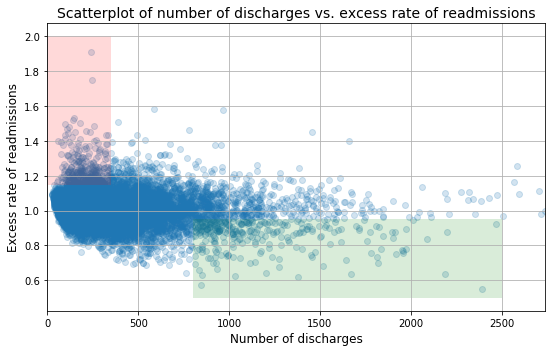

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
print(clean_hospital_read_df.describe())
print('\n')
print(clean_hospital_read_df.info())

       Provider Number  Number of Discharges  Footnote  \
count     11578.000000          11578.000000      81.0   
mean     257681.537226            362.909397       7.0   
std      154542.645531            309.176945       0.0   
min       10001.000000              0.000000       7.0   
25%      110129.750000            157.000000       7.0   
50%      250040.000000            280.000000       7.0   
75%      390041.000000            472.750000       7.0   
max      670082.000000           6793.000000       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
count              11497.000000                11497.000000   
mean                   1.007504                   17.984292   
std                    0.091964                    5.487651   
min                    0.549500                    2.700000   
25%                    0.952600                   16.300000   
50%                    1.003500                   19.000000   
75%                    1.058100     

In [6]:
print(clean_hospital_read_df.isnull().any())

Hospital Name                 False
Provider Number               False
State                         False
Measure Name                  False
Number of Discharges          False
Footnote                       True
Excess Readmission Ratio       True
Predicted Readmission Rate     True
Expected Readmission Rate      True
Number of Readmissions         True
Start Date                    False
End Date                      False
dtype: bool


In [7]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [8]:
# Check for some unique values of Hopsitals, Provider IDs, and States
print('Number of Unique Hospitals :', clean_hospital_read_df['Hospital Name'].nunique(), '\n')
print('Number of Unique provider IDs :', clean_hospital_read_df['Provider Number'].nunique(), '\n')
print('Number of States :', clean_hospital_read_df['State'].nunique())


Number of Unique Hospitals : 2921 

Number of Unique provider IDs : 3036 

Number of States : 51


In [9]:
# Clearing entries with NaN in the Excess Readmission Ratio Column with [0]
clean_hospital_read_df['Excess Readmission Ratio'] = clean_hospital_read_df['Excess Readmission Ratio'].fillna(0)

In [10]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,0.0,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,0.0,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,0.0,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,0.0,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,0.0,NaN,NaN,NaN,07/01/2010,06/30/2013


D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


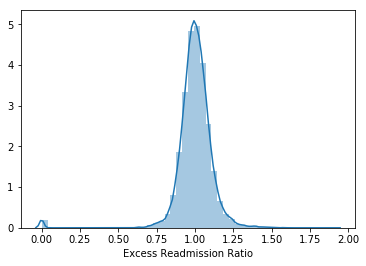

In [11]:
sns.distplot(clean_hospital_read_df['Excess Readmission Ratio'])

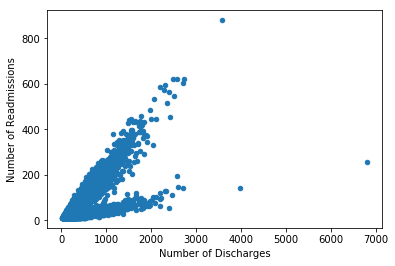

In [12]:
clean_hospital_read_df.plot.scatter(x="Number of Discharges", y="Number of Readmissions")

In [13]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11578 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


### A. Do you agree with the above analysis and recommendations? Why or why not?

#### From above statement, "In hospistals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than one.

In [14]:
# Fact Check:
hospital_less_100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]

# number of hospitals
print(len(hospital_less_100))

# what is the mean readmission rate
print(round(hospital_less_100['Excess Readmission Ratio'].mean(), 3))

# what percentage of the hopistals have greater than 1%
print(round((len(hospital_less_100[hospital_less_100['Excess Readmission Ratio'] > 1]) / len(hospital_less_100)) * 100, 3), '%')

1269
0.957
59.18 %


#### Because of the filled NaN values, the number checking no longer agrees with the preliminary report. 

#### We will have to take a closer look.

### B. Provide suppoprt for your arguments and your own recommendations with a statistically sound analysis:

### 1) Setup an appropriate hypothesis test.

#### Null Hypothesis: There is no statistically significant correlation between number of discharges and readmission rates.

#### Alternate Hypothesis: There is a statistically significant correlation between number of discharges and readmission rates

### 2) Compute and report the observed significance value (or p-value).

Check the pearson correlations:

In [15]:
df = clean_hospital_read_df

from scipy import stats
discharges = df[df['Number of Discharges'] > 0]['Number of Discharges']
readmission = df[df['Number of Discharges'] > 0]['Excess Readmission Ratio']
corr, p_val = stats.pearsonr(discharges, readmission)

print('correlation coefficient:',corr)
print('p value =',p_val)

correlation coefficient: -0.09739794351079353
p value = 1.222547377680967e-25


The test shows that there are very small correlation between numbers of discharges and excess readmission. 

### 3) Report statistical significance for  α  = .01.

Because the p-value is 1.22e-25, it is significantly smaller than alpha of 0.01. This is statistically significant.

### 4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?


Statisical significance indicates that the sample provides sufficient evidence to conclude that the effect exists in the population. Practical significance asks whether that effect is large enough to care about. 

In our case, there's statistical significance that there are correlation between the number of discharges and readmission rates. However, using that information to conclude "a significant correlation between hospital capacity (number of discharges) and readmission rates." is flawed, because the practical significance shows that there are big hospitals with high turn over rate and small hospital with low turn over rate.

So instead of recommending policies to consolidate hospitals with small capacities into mega-tramua center with high capacities and discharges. It would be advisable to re-assess the data using different metrics to evaluate which hospitals is performing more efficiently with their readmission and discharge rate. 

### 5) Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The scatter plot provides an advanage of easily displaying the overall trend of the data in 2D and the density of the distirbution, however the cons being that the no correlations or relationships are shown and data points are overlappedwith increased sample size. 

Below are a few plots that divide the plots into both smaller chunks to be visilize as well as a new plot to address correlation and the distribution of the data.

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set()

In [23]:
# Seperating the hospitals by number of discharges
small = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100)]

high = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000)]

med = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 1000) &
                             (clean_hospital_read_df['Number of Discharges'] > 100)]

In [24]:
x_low, y_low = (small['Number of Discharges']), small['Excess Readmission Ratio']

x_med, y_med = (med['Number of Discharges']), med['Excess Readmission Ratio']

x_high, y_high = (high['Number of Discharges']), high['Excess Readmission Ratio']


D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


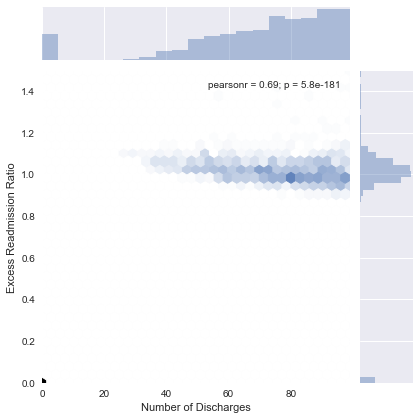

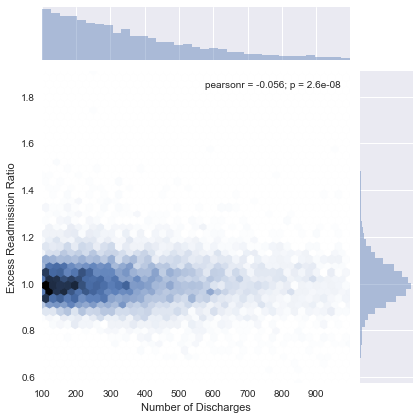

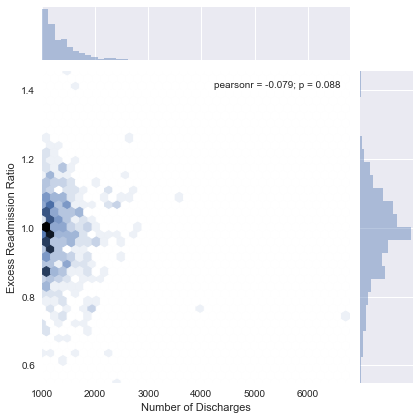

In [28]:
sns.jointplot(x_low, y_low, kind='hex')

sns.jointplot(x_med, y_med, kind='hex')

sns.jointplot(x_high, y_high, kind='hex');

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


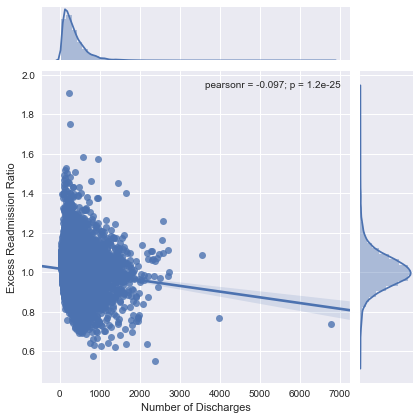

In [26]:
sns.jointplot(discharges, readmission, kind='reg');